/opt/anaconda3/envs/python/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


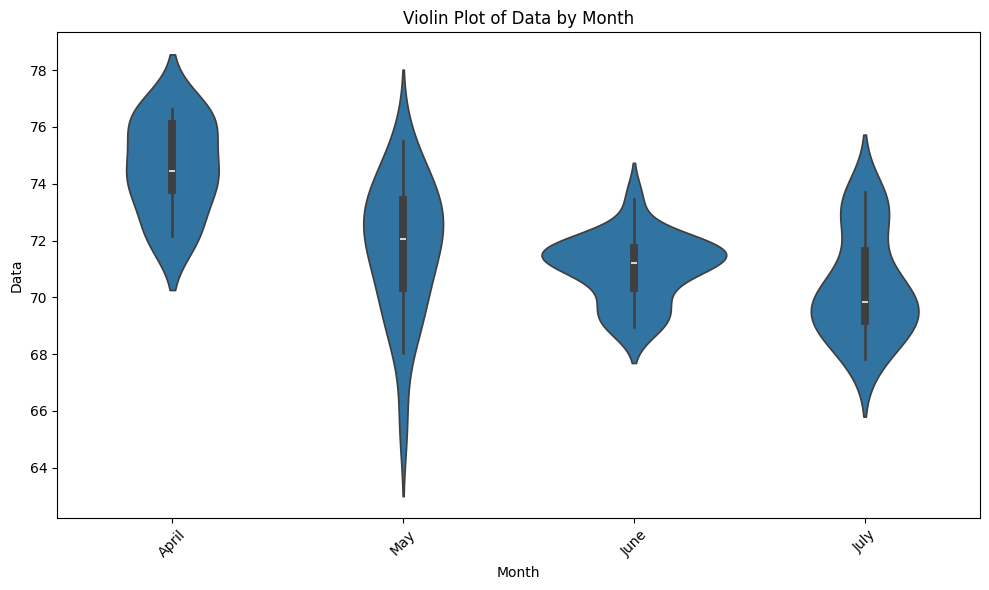

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("hf://datasets/Nhule0502/Financial_data/ZV_Graph_csv.csv")

# Clean the column names
df.columns = df.columns.str.strip()

# Convert data to DataFrame
df = pd.DataFrame(df)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract the month from the Date
df['Month'] = df['Date'].dt.strftime('%B')

# Sort DataFrame by date
df = df.sort_values(by='Date')

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Month', y='Data', data=df, order=df['Month'].unique())
plt.title('Violin Plot of Data by Month')
plt.xlabel('Month')
plt.ylabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


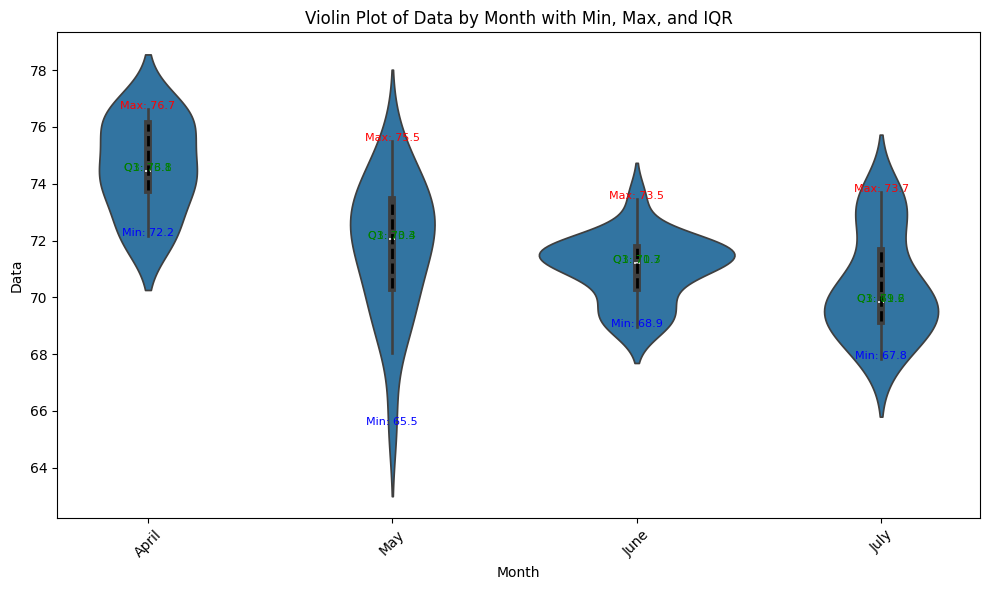

In [2]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract the month from the Date
df['Month'] = df['Date'].dt.strftime('%B')

# Sort DataFrame by date
df = df.sort_values(by='Date')

# Calculate IQR, min, and max for each month
summary_stats = df.groupby('Month')['Data'].describe(percentiles=[.25, .5, .75])
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Month', y='Data', data=df, order=df['Month'].unique())

# Overlay min, max, and IQR
for i, month in enumerate(df['Month'].unique()):
    plt.text(i, summary_stats.loc[month, 'min'], f'Min: {summary_stats.loc[month, "min"]:.1f}', 
             horizontalalignment='center', color='blue', fontsize=8)
    plt.text(i, summary_stats.loc[month, 'max'], f'Max: {summary_stats.loc[month, "max"]:.1f}', 
             horizontalalignment='center', color='red', fontsize=8)
    plt.text(i, summary_stats.loc[month, '50%'], f'Q1: {summary_stats.loc[month, "25%"]:.1f}', 
             horizontalalignment='center', color='green', fontsize=8)
    plt.text(i, summary_stats.loc[month, '50%'], f'Q3: {summary_stats.loc[month, "75%"]:.1f}', 
             horizontalalignment='center', color='green', fontsize=8)

# Annotate the IQR range
for i, month in enumerate(df['Month'].unique()):
    plt.vlines(i, summary_stats.loc[month, '25%'], summary_stats.loc[month, '75%'], color='black', linestyle='--', linewidth=2)

plt.title('Violin Plot of Data by Month with Min, Max, and IQR')
plt.xlabel('Month')
plt.ylabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

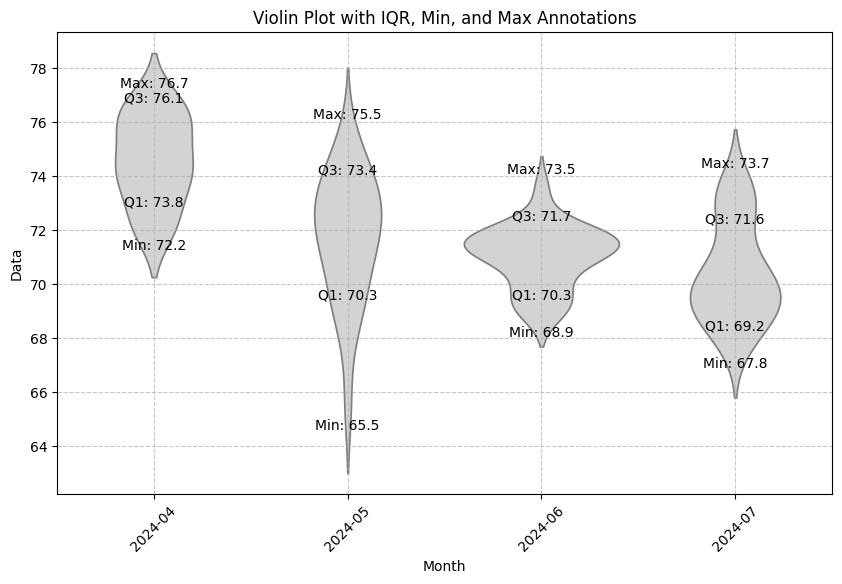

In [4]:
# Convert to DataFrame
df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%Y-%m')  # Extracting Year-Month for grouping

# Initialize plot
plt.figure(figsize=(10, 6))

# Create a violin plot
sns.violinplot(x='Month', y='Data', data=df, inner=None, color="lightgray")

# Overlay IQR, min, max
grouped = df.groupby('Month')['Data']
for i, (month, values) in enumerate(grouped):
    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)
    iqr = q3 - q1
    lower_bound = values.min()
    upper_bound = values.max()
    
    # Plot IQR, min, max outside the violin
    plt.text(i, lower_bound - 0.5, f'Min: {lower_bound:.1f}', ha='center', va='top', color='black')
    plt.text(i, upper_bound + 0.5, f'Max: {upper_bound:.1f}', ha='center', va='bottom', color='black')
    plt.text(i, q1 - 0.5, f'Q1: {q1:.1f}', ha='center', va='top', color='black')
    plt.text(i, q3 + 0.5, f'Q3: {q3:.1f}', ha='center', va='bottom', color='black')

# Customize the plot
plt.title('Violin Plot with IQR, Min, and Max Annotations')
plt.xlabel('Month')
plt.ylabel('Data')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()